# Spotify Track Analysis

## Loading Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset into a dataframe
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning

In [2]:
# Check for missing values
print("Missing data points:")
df_missing = df[df.isnull().any(axis=1)]
df_missing

Missing data points:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [3]:
df.dropna(inplace=True)  # Drop rows with missing values since it is only one data point
len(df)  # Check the length of the dataframe after dropping missing values

113999

## Initial Data Analysis

In [4]:
# Quick look at the data
print("Columns in dataset:")
df.columns

Columns in dataset:


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
# Basic info and stats
print("Data info:")
df.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness      

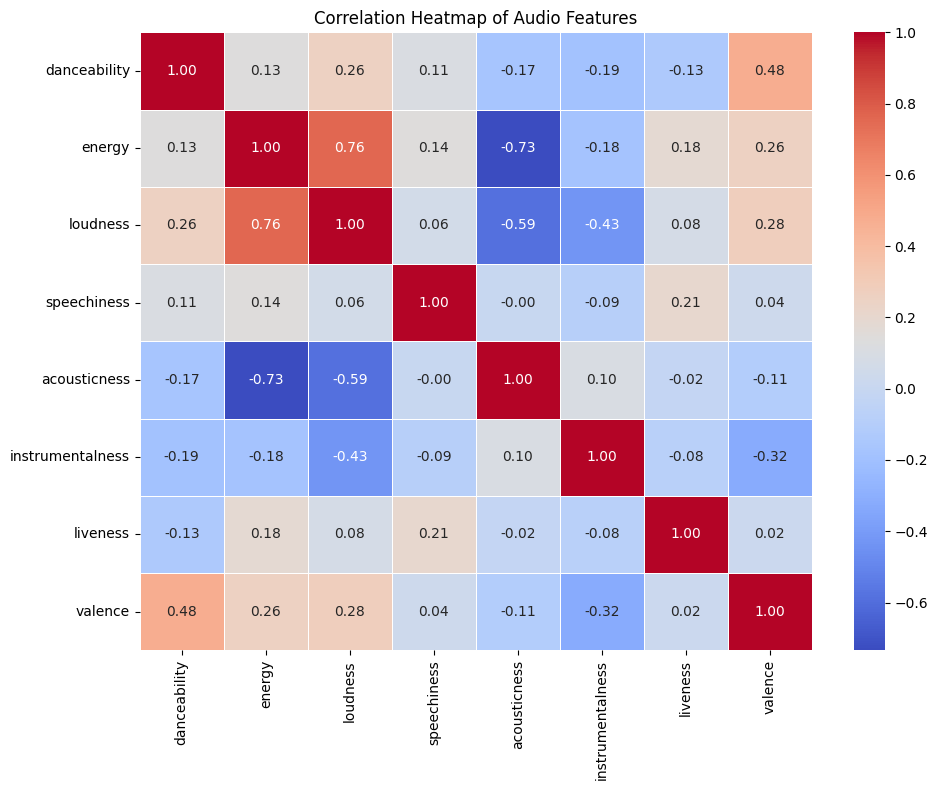

In [ ]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
# Calculate the correlation matrix using all defined features
corr = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Audio Features")
plt.tight_layout()
plt.show()

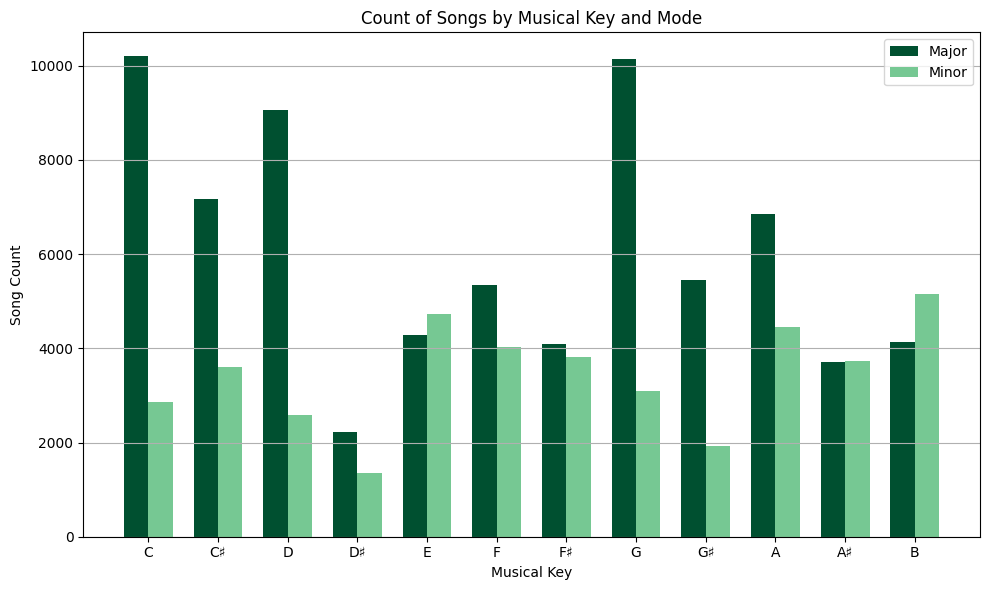

In [21]:
# Define mappings for key names and mode labels
key_names = {0: 'C', 1: 'C♯', 2: 'D', 3: 'D♯', 4: 'E', 5: 'F', 
             6: 'F♯', 7: 'G', 8: 'G♯', 9: 'A', 10: 'A♯', 11: 'B'}
mode_names = {1: 'Major', 0: 'Minor'}

# Filter songs to only those with valid keys (ignore key == -1)
df_valid = df[df['key'] >= 0]

# Group by key and mode then count the number of songs
grouped = df_valid.groupby(['key', 'mode']).size().reset_index(name='count')

# Pivot the data so that rows = key and columns = mode, filling missing with 0
pivot = grouped.pivot(index='key', columns='mode', values='count').fillna(0)
pivot = pivot.reindex(range(12), fill_value=0)

# Prepare indices and settings
indices = np.arange(12)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

major_counts = pivot.get(1, pd.Series(0, index=indices))
minor_counts = pivot.get(0, pd.Series(0, index=indices))

ax.bar(indices - bar_width/2, major_counts, width=bar_width, label='Major', color='#005030')
ax.bar(indices + bar_width/2, minor_counts, width=bar_width, label='Minor', color='#76c893')

ax.set_xlabel('Musical Key')
ax.set_ylabel('Song Count')
ax.set_title('Count of Songs by Musical Key and Mode')
ax.set_xticks(indices)
ax.set_xticklabels([key_names.get(k, str(k)) for k in indices])
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()

## Explicit Track Analysis

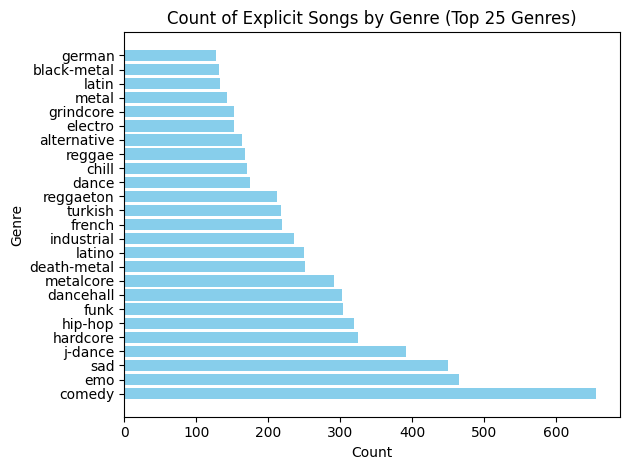

In [6]:
# Plot only the explicit (True) counts by genre
df_explicit = df[df['explicit'] == True]
df_non_explicit = df[df['explicit'] == False]

genre_counts = df_explicit['track_genre'].value_counts().head(25)

plt.barh(genre_counts.index, genre_counts.values, color='skyblue')

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count of Explicit Songs by Genre (Top 25 Genres)')
plt.tight_layout()
plt.show()


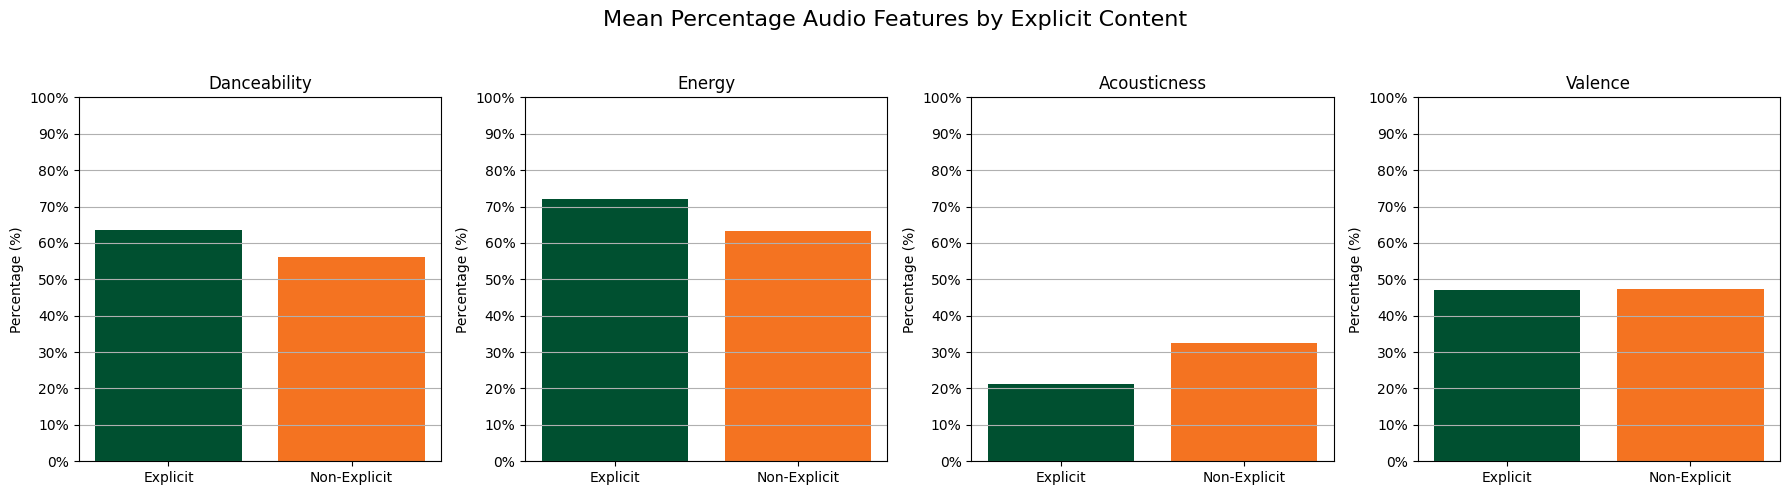

In [ ]:
features = ['danceability', 'energy', 'loudness', 'valence', 'acousticness', 'tempo']
percentage_features = ['danceability', 'energy', 'acousticness', 'valence']

explicit_means = df_explicit[features].mean()
non_explicit_means = df_non_explicit[features].mean()

# Convert to percentages
explicit_means[percentage_features] *= 100
non_explicit_means[percentage_features] *= 100

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))
axes = axes.flatten()

for i, feature in enumerate(percentage_features):
    axes[i].bar(['Explicit', 'Non-Explicit'], [explicit_means[feature], non_explicit_means[feature]], color=['#005030', '#f47321'])
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 100)
    axes[i].set_yticks(np.arange(0, 101, 10))
    axes[i].set_yticklabels([f'{t}%' for t in np.arange(0, 101, 10)])
    axes[i].grid(axis='y')

fig.suptitle('Mean Percentage Audio Features by Explicit Content', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


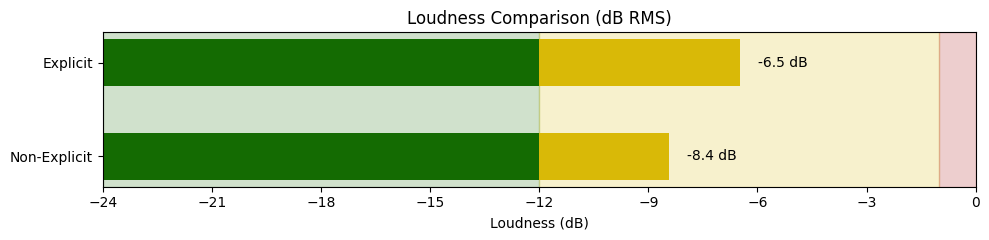

In [ ]:
# Define the spans (start, end, color)
min_val = -24  # Minimum value for loudness
spans = [
    (min_val, -12, '#146b02'),
    (-12, -1, '#d9b907'),
    (-1, 0, '#a60c0c'),
]

labels = ['Explicit', 'Non-Explicit']
values = [explicit_means["loudness"], non_explicit_means["loudness"]]

fig, ax = plt.subplots(figsize=(10, 2.5))

# draw the background 
for start, end, c in spans:
    ax.axvspan(start, end, color=c, alpha=0.2)

# now draw each bar in segments
for i, (label, val) in enumerate(zip(labels, values)):
    y = i  
    for start, end, c in spans:
        seg_start = max(start, min_val)
        seg_end = min(end, val)
        if seg_end > seg_start:
            ax.barh(label, seg_end - seg_start, left=seg_start, height=0.5, color=c, edgecolor='none')

    # put the text at the end of the full bar
    ax.text(val + 0.5, y, f"{val:.1f} dB", va='center', ha='left', fontsize=10)

ax.set_xlim(min_val, 0)
ax.set_xticks(np.arange(min_val, 1, 3))
ax.set_xlabel("Loudness (dB)")
ax.set_title("Loudness Comparison (dB RMS)")
ax.invert_yaxis() 
ax.grid(False)
plt.tight_layout()
plt.show()